## Acceleration model (8 parameter + 1)

Here we solve for the system as above, but add one more parameter to estimate for a 9th parameter

$$\Bigg\| 
\begin{bmatrix}
t \\ 0
\end{bmatrix}
-
\begin{bmatrix}
A & 0\\ 
0 & \mathbb{I} * \sqrt{\lambda}
\end{bmatrix}
\begin{bmatrix}
x \\
x"
\end{bmatrix}
\Bigg\| ^2
$$

Here we solve the following system

$$\begin{align}
t &=   s_i(k+1) - s_i(k) \\
A &=  \begin{bmatrix} 
         s_i(k-1) 
        &s_i(k-2) 
        &v_i(k)   
        &v_i(k-1)
        &v_i(k+1)
        &v_i(k)  
        &v_i(k-1) 
        &v_i(k-2) 
    \end{bmatrix} \\
x &= \begin{bmatrix} 
        \theta_{s_1}                                 
        \\ \theta_{s_2}                                 
        \\ \theta_{s_3}                                 
        \\ \theta_{s_4}                                
        \\ \frac{\theta_{s_5}}{\theta_{v_4}}            
        \\ \frac{\theta_{s_5}\theta_{v_1}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_2}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_3}}{\theta_{v_4}}
    \end{bmatrix} \\

\end{align}
$$

In [ ]:
# Create the design matrix A based on your formula
A_x = np.vstack([
    s_x[1:-2],          # s_i(k-1)
    s_x[0:-3],          # s_i(k-2)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
    v_x[3:],            # v_i(k+1)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
   -v_x[0:-3]           # -v_i(k-2)
]).T

t_x = np.array(s_x[3:] - s_x[2:-1])          # s_i(k+1) - s_i(k)

print("A matrix: " + str(A_x.shape))
print("Target Matrix: " + str(np.array(t_x).shape))


A matrix: (205180, 8)
Target Matrix: (205180,)


In [ ]:
def add_identity_block(A, B):
    B_zero = np.zeros((len(B), len(A.T)))
    A_zero = np.zeros((len(A), len(B.T)))
    return np.block([
        [A, A_zero], 
        [B_zero, B]])

n = 1               # Number of additional parameters
lambda_val = 0.9
identity_matrix = np.eye(n) * lambda_val

A_block= add_identity_block(A_x, identity_matrix)
target_block = np.concatenate([t_x, np.zeros(n)])


print("A matrix: " + str(A_block.shape))
print("t matrix: " + str(target_block.shape))

A matrix: (205181, 9)
t matrix: (205181,)


Coefficients:
-0.002476674948458898
-0.002965542010602479
-1.9745020553998223
0.004545597368920395
3.956655020242682
-1.9745020553998185
0.004545597368917398
-0.02531816337774683
0.018319089837621292
Mean Squared Error: 10.780873292839123
R-squared (R2) Score: 0.3985900181102421


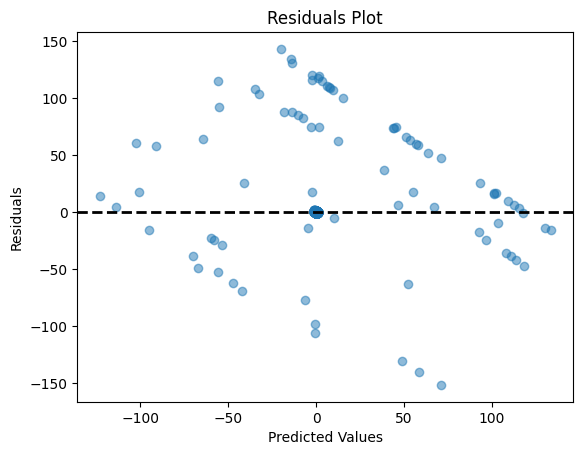

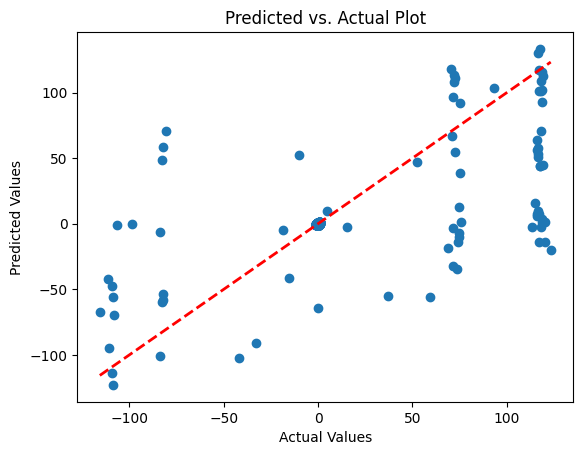

In [ ]:
perform_linear_regression(A_block, target_block)